# Description
This is the analysis of the chlorophyll fluorometer by taking measurements 
of chlorophyll standards via rhodamine dye. This analysis is to test the fluorometer's measurement sensitivity using serial dilutions of rhodamine dye.

# Fluorometer Testing

## Fluorometer Design    
This fluorometer is a benchtop model with housing which positions the LED and 
the AS7341 at a 90 degree angle as well as will be an opaque design as to 
eliminate any ambient light from impacting the measurements. The top of the benchtop design contains a hole 
which fits a cuvette. A cuvette is placed into the fluorometer with the water
sample to begin testing. Design materials an be found at:
https://github.com/COAST-Lab/Chlorophyll-Fluorometer-/tree/main/Firmware. 

# Testing Procedure

## Step 1
A YSI instrument was calibrated to be used to verify the chlorophyll water sample which would be prepared. Calibration information: https://www.ysi.com/file%20library/documents/manuals/exo-user-manual-web.pdf

## Step 2
A water sample was prepared with a chlorophyll concentration of 63.5 ug/L and an RFU of 15.8 RFU. This water sample was prepared with rhodamine dye and DI water

## Chlorophyll Sample Preparation
### Step 1
5mL of Rhodamine dye was pipetted into a 1000mL volumetric flask or beaker. Fill the flask or beaker up to 1000mL mark with DI water

### Step 2
Pipette 5mL of the prepared solution in step 1 into a separate 1000mL volumetric flask or beaker. Fill this flask or beaker up to 1000mL mark with DI water. This will be your chlorophyll water sample

### Step 3
Verify the concentration of the prepared chlorophyll water sample with the YSI

## Water Dilutions  
Create diluted water samples. From the 1000mL stock of 63.5 ug/L chlorophyll water sample prepare water samples diluted to: 50 ug/L, 40 ug/L, 30 ug/L, 20 ug/L, 10ug/L, 8 ug/L, 6 ug/L, 4 ug/L, 2 ug/L, 0.75 ug/L, 0.5 ug/L and 0.25ug/L. 

## Step 3
Once the diluted water samples are prepared begin testing procedure.

## Step 4
To begin tests, insert a cuvette filled with DI water into the fluorometer, this will act as your "blank". Cover the fluorometer with the box and run for 1 minute. 

## Step 5 
Stop readings and take the cuvette filled with DI water out of the fluorometer. Insert a cuvette filled with the 0.25 ug/L solution. Cover the fluorometer with the box and run for 1 minute.

## Step 6
Repeat the 1 minute tests for each diluted water sample. 

## Step 7
Stop testing and take the SD card out of the fluorometer and plug it into the computer to begin analysis of the data collected.

## Step 8
This test will be performed first with an LED intensity of 255 and a AS73411 gain of 512x and an ATIME of 59 and ASTEP of 599 and then repeated with a gain of 256x and then 128x. The data is recorded onto the SD card in the microcontroller. 

# Data Analysis

## Graphing
When taking measurements the AS7341 light sensor collects light measurements of multiple wavelengths. The wavelength of 680nm (denoted as F8) will be analyzed.

## Graph characteristics
Each graph shows the catagories of the water sample dilution concentrations on the x-axis to denote each test. And the numerical value of the F8 light measurement on the y-axis. The mean of each category will be plotted with an error bar with extends from the lowest value of the data set to the largest.

### Step 1 
import necessary modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress, t
from sklearn.metrics import r2_score, mean_squared_error
import math

### Step 2 
import file type (.csv file), convert F8 values to numeric, and specify the test values as the dilution values

In [3]:
# Replace with the actual file path
file_path = "/Users/jessiewynne/chla_fluorometer/AS7341 Dilutuions 9.14.23/512x_700ms_2.csv"
# Read the CSV file without skipping any rows

df = pd.read_csv(file_path, encoding='utf-8')

# Filter out rows where the 'Test' column is 'test'
df = df[df['Test'].str.lower() != 'test']

# Convert 'F8 (Raw)' column to numeric values
df['F8 (Raw)'] = pd.to_numeric(df['F8 (Raw)'], errors='coerce')

# Get unique test categories (dilution values) in the order of appearance
categories = df['Test'].unique()

### Step 3 
Create dictionaries for the F8 values and confidence intervals. 
For each category calculate: mean and standard deviations, standard error, confidence level, uncertainty values and margin of error. 

In [4]:
# Create a dictionary to store the 'F8 (Raw)' values for each category (dilution)
category_f8_raw_dict = {}

# Create dictionaries to store confidence intervals and ranges of uncertainty
confidence_intervals = {}
uncertainty_ranges = {}

# Store unique x-values and their corresponding data points
x_values = []
y_values = []
std_devs = []

for category in categories:
    # Exclude the first data point from each category
    category_df = df[df['Test'] == category][1:]
    category_f8_raw_dict[category] = category_df['F8 (Raw)']

    # Calculate the mean and standard deviation for 'F8 (Raw)' data in each category
    category_f8_raw_mean = category_df['F8 (Raw)'].mean()
    category_f8_raw_std = category_df['F8 (Raw)'].std()
        # Calculate the sample size for each category
    category_sample_size = len(category_df['F8 (Raw)'])
    # Calculate the standard error for each category's mean
    category_standard_error = category_f8_raw_std / np.sqrt(category_sample_size)

    # Define the confidence level (e.g., 95%)
    confidence_level = 0.95

    # Calculate the margin of error using the t-distribution
    margin_of_error = t.ppf((1 + confidence_level) / 2, category_sample_size - 1) * category_standard_error

    # Calculate the confidence interval for each category's mean
    confidence_interval = (category_f8_raw_mean - margin_of_error, category_f8_raw_mean + margin_of_error)

    # Calculate the range of uncertainty (95% CI width) for each category
    uncertainty_range = confidence_interval[1] - confidence_interval[0]

    # Store confidence intervals and uncertainty ranges in dictionaries
    confidence_intervals[category] = confidence_interval
    uncertainty_ranges[category] = uncertainty_range

    # Print confidence intervals and ranges of uncertainty for each category
    print(f"{category} - 95% Confidence Interval for F8 (Raw): {confidence_interval[0]:.4f} to {confidence_interval[1]:.4f}")
    print(f"{category} - Range of Uncertainty (95% CI Width): {uncertainty_range:.4f}")
    print(category_f8_raw_mean, "mean value")
    print(category_standard_error, "standard error")
    print(category_f8_raw_std, "standard deviation")
    print()
        # Check if the 'Test' value can be converted to a float, otherwise, skip it
    try:
        x_value = float(category)
        x_values.append(x_value)
        y_values.append(category_f8_raw_mean)
        std_devs.append(category_f8_raw_std)
    except ValueError:
        pass

0.0 - 95% Confidence Interval for F8 (Raw): 9.6951 to 10.9715
0.0 - Range of Uncertainty (95% CI Width): 1.2764
10.333333333333334 mean value
0.30249507099101003 standard error
1.2833778958394957 standard deviation

0.25 - 95% Confidence Interval for F8 (Raw): 8.4988 to 9.7235
0.25 - Range of Uncertainty (95% CI Width): 1.2247
9.11111111111111 mean value
0.290243180538229 standard error
1.2313975269103985 standard deviation

0.50 - 95% Confidence Interval for F8 (Raw): 17.5187 to 19.0369
0.50 - Range of Uncertainty (95% CI Width): 1.5182
18.27777777777778 mean value
0.3597889319121795 standard error
1.5264551613058026 standard deviation

0.75 - 95% Confidence Interval for F8 (Raw): 24.3804 to 25.3974
0.75 - Range of Uncertainty (95% CI Width): 1.0171
24.88888888888889 mean value
0.24103384202072908 standard error
1.0226199851298272 standard deviation

2.0 - 95% Confidence Interval for F8 (Raw): 29.1472 to 30.8528
2.0 - Range of Uncertainty (95% CI Width): 1.7057
30.0 mean value
0.40422

### Step 4
For the entire dataset calculate the: standard deviation, mean, standard error, confidence interval and rang of uncertainty. Print these values

In [5]:
# Calculate the mean and standard deviation for the entire dataset for 'F8 (Raw)' data
dataset_f8_raw_mean = df['F8 (Raw)'].mean()
dataset_f8_raw_std = df['F8 (Raw)'].std()

# Calculate the sample size for the entire dataset
dataset_sample_size = len(df['F8 (Raw)'])

# Calculate the standard error for the entire dataset's mean
dataset_standard_error = dataset_f8_raw_std / np.sqrt(dataset_sample_size)

# Calculate the margin of error using the t-distribution
confidence_level = 0.95
margin_of_error = t.ppf((1 + confidence_level) / 2, dataset_sample_size - 1) * dataset_standard_error

# Calculate the confidence interval for the entire dataset's mean
confidence_interval = (dataset_f8_raw_mean - margin_of_error, dataset_f8_raw_mean + margin_of_error)

# Calculate the range of uncertainty (95% CI width) for the entire dataset
uncertainty_range = confidence_interval[1] - confidence_interval[0]
# Print the confidence interval and range of uncertainty for the entire dataset
print("\nEntire Dataset:")
print(f"95% Confidence Interval for F8 (Raw): {confidence_interval[0]:.4f} to {confidence_interval[1]:.4f}")
print(f"Range of Uncertainty (95% CI Width) for Entire Dataset: {uncertainty_range:.4f}")
print()


Entire Dataset:
95% Confidence Interval for F8 (Raw): 75.1315 to 96.9403
Range of Uncertainty (95% CI Width) for Entire Dataset: 21.8088



### Step 5
Find the lowest and highest uncertainty range within the categories, calculate the percentage for the lowest and highest uncertainty ranges within the categories. Print these values. 

In [6]:
# Find the lowest and highest uncertainty range within the categories
min_uncertainty_range = min(uncertainty_ranges.values())
max_uncertainty_range = max(uncertainty_ranges.values())

# Calculate the percentage for the lowest and highest uncertainty ranges within the categories
min_uncertainty_percentage = (min_uncertainty_range / dataset_f8_raw_mean) * 100
max_uncertainty_percentage = (max_uncertainty_range / dataset_f8_raw_mean) * 100

# Print the lowest and highest uncertainty ranges as percentages for the entire dataset
print(f"Lowest Uncertainty Range in Categories (as Percentage): {min_uncertainty_percentage:.2f}%")
print(f"Highest Uncertainty Range in Categories (as Percentage): {max_uncertainty_percentage:.2f}%")

Lowest Uncertainty Range in Categories (as Percentage): 1.17%
Highest Uncertainty Range in Categories (as Percentage): 2.27%


### Step 6
Create a scatter plot for thre F8 values. Calculate the line of best it parameters, and a fucntion to calculate the predicted values from the line of best fit. Plot the line of best fit. Calculate  the RSME and R-sqaured and print these on the graph. Set the x-axis to intervals of 5 and create titles for the graph.  

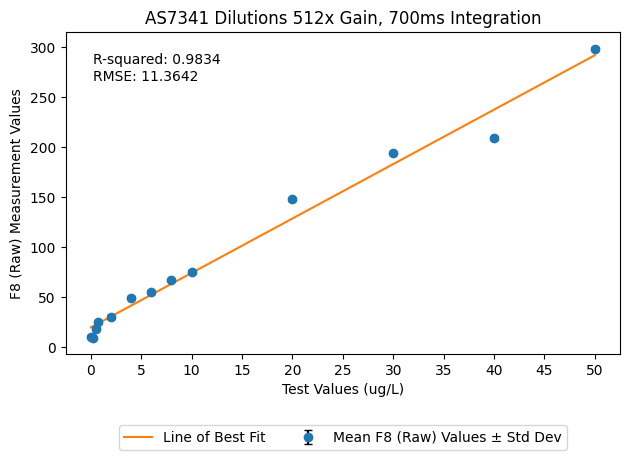

In [7]:
# Scatter plot for mean F8 values with error bars and legend
plt.errorbar(x_values, y_values, yerr=std_devs, fmt='o', capsize=3, ecolor='black', label='Mean F8 (Raw) Values ± Std Dev')

# Calculate the line of best fit parameters (slope and intercept)
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Create a function to calculate predicted values using the line of best fit equation
def predict_values(x, slope, intercept):
    return slope * x + intercept

# Plot the line of best fit
plt.plot(x_values, predict_values(np.array(x_values), slope, intercept), label='Line of Best Fit')
# Calculate R-squared and RMSE
y_predicted = predict_values(np.array(x_values), slope, intercept)
r_squared = r2_score(y_values, y_predicted)
MSE = mean_squared_error(y_values, y_predicted)
 
RMSE = math.sqrt(MSE)

# Set x-axis tick positions at intervals of 5
plt.xticks(np.arange(min(x_values), max(x_values)+1, 5))

plt.xlabel('Test Values (ug/L)')
plt.ylabel('F8 (Raw) Measurement Values')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)  # Move legend down and adjust layout
plt.title("AS7341 Dilutions 512x Gain, 700ms Integration")


# Display R-squared and RMSE on the plot
plt.annotate(f'R-squared: {r_squared:.4f}\nRMSE: {RMSE:.4f}', xy=(0.05, 0.85), xycoords='axes fraction')


plt.tight_layout()
plt.show()